Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

NAME = "WAHAB ULLAH"
SEED = 123
np.random.seed(SEED)

print("Student:", NAME)
print("Random Seed:", SEED)

Student: WAHAB ULLAH
Random Seed: 123


Importing gray scale and RGB image

Gray shape: (650, 941)
RGB shape: (382, 582, 3)


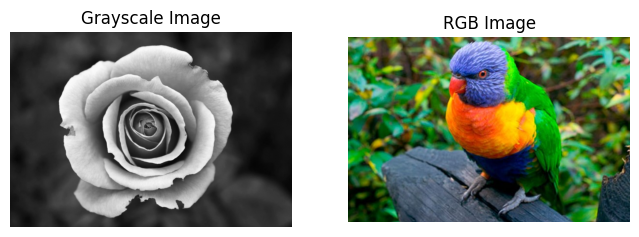

In [2]:
# Load grayscale
gray = cv2.imread("datasets/gray.jpg", cv2.IMREAD_GRAYSCALE)

# Load RGB
rgb = cv2.imread("datasets/rgb.jpg")
rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)

print("Gray shape:", gray.shape)
print("RGB shape:", rgb.shape)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(rgb)
plt.title("RGB Image")
plt.axis("off")

plt.show()

Manaul convolution for gray scale

In [3]:
def conv2d_gray(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad = kh // 2

    padded = np.pad(image, ((pad,pad),(pad,pad)), mode='constant')
    output = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            output[i,j] = np.sum(region * kernel)

    return output

Manual convolution for RGB

In [4]:
def conv2d_rgb(image, kernel):
    h, w, c = image.shape
    kh, kw = kernel.shape
    pad = kh // 2

    padded = np.pad(image, ((pad,pad),(pad,pad),(0,0)), mode='constant')
    output = np.zeros((h, w, c))

    for ch in range(c):
        for i in range(h):
            for j in range(w):
                region = padded[i:i+kh, j:j+kw, ch]
                output[i,j,ch] = np.sum(region * kernel)

    return output


Applying Kernel

In [5]:
kernel = np.array([
    [-1,-1,-1],
    [-1, 8,-1],
    [-1,-1,-1]
])

print("Kernel:\n", kernel)


Kernel:
 [[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


Applying Convolution

In [6]:
gray_conv = conv2d_gray(gray, kernel)
rgb_conv = conv2d_rgb(rgb, kernel)

print("Gray conv shape:", gray_conv.shape)
print("RGB conv shape:", rgb_conv.shape)


Gray conv shape: (650, 941)
RGB conv shape: (382, 582, 3)


Applying Relu

In [7]:
relu_gray = np.maximum(gray_conv, 0)
relu_rgb = np.maximum(rgb_conv, 0)


Visualizing the results.

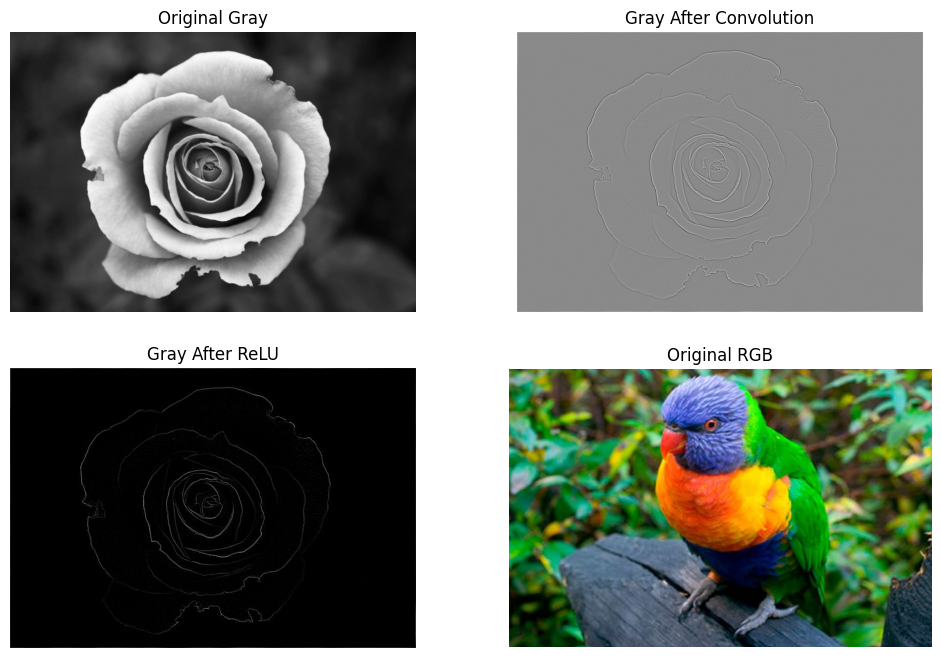

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-401.0..788.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..788.0].


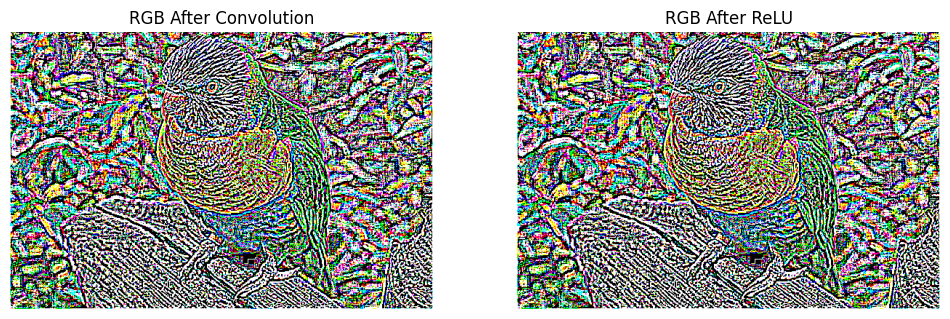

In [8]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Gray")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(gray_conv, cmap='gray')
plt.title("Gray After Convolution")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(relu_gray, cmap='gray')
plt.title("Gray After ReLU")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(rgb)
plt.title("Original RGB")
plt.axis("off")

plt.show()

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.imshow(rgb_conv.astype(np.float32))
plt.title("RGB After Convolution")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(relu_rgb.astype(np.float32))
plt.title("RGB After ReLU")
plt.axis("off")

plt.show()

Verifying with open cv

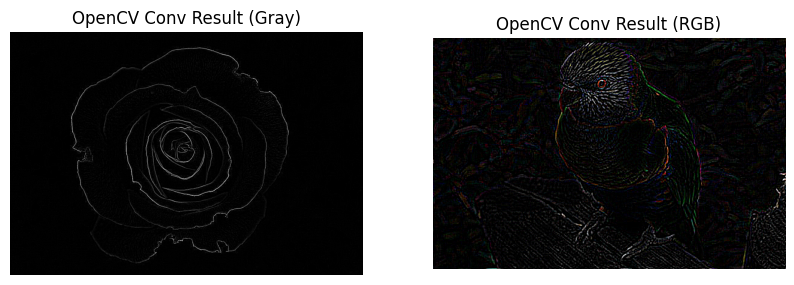

In [9]:
gray_cv = cv2.filter2D(gray, -1, kernel)
rgb_cv = cv2.filter2D(rgb, -1, kernel)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray_cv, cmap='gray')
plt.title("OpenCV Conv Result (Gray)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(rgb_cv)
plt.title("OpenCV Conv Result (RGB)")
plt.axis("off")

plt.show()

The manually implemented convolution produces almost the same visual 
results for grayscale  as cv2.filter2D(),but a little different for rgb, so my implementation is correct. 
ReLU removes negative values which helps highlight only strong edges.